#### Import required libraries

In [5295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Load train and test dataset

In [5296]:
train_data=pd.read_csv('Dataset/train.csv')
test_data=pd.read_csv('Dataset/test.csv')

#### Print first 5 rows of train data

In [5297]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Check shape of train and test data

In [5298]:
train_data.shape

(614, 13)

In [5299]:
test_data.shape

(367, 12)

#### Print dtypes and name of columns

In [5300]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Check if train and test data has any missing or null values

In [5301]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5302]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

#### Gender is a categorical column, lets see its value counts before handling missing values

In [5303]:
train_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

#### As male category is more frequent , we will impute missing values with 'Male' i.e. mode of Gender.

In [5304]:
train_data['Gender']=train_data['Gender'].fillna(train_data['Gender'].mode()[0])
test_data['Gender']=test_data['Gender'].fillna(train_data['Gender'].mode()[0])

#### Married is also a categorical column , lets see its value counts 

In [5305]:
train_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

#### As Yes category is more frequent , we will impute missing values with 'Yes' i.e. mode of Married.

In [5306]:
train_data['Married']=train_data['Married'].fillna(train_data['Married'].mode()[0])

#### Let's see value counts for Dependents

In [5308]:
train_data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

#### As '0' category is more frequent , we will impute missing values with '0' i.e. mode of Dependents.

In [5219]:
train_data['Dependents']=train_data['Dependents'].fillna(train_data['Dependents'].mode()[0])
test_data['Dependents']=test_data['Dependents'].fillna(train_data['Dependents'].mode()[0])

#### Let's see value counts for Self_Employed

In [5220]:
train_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

#### As No category is more frequent , we will impute missing values with 'NO' i.e. mode of Self_Employed.

In [5221]:
train_data['Self_Employed']=train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])
test_data['Self_Employed']=test_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])

#### LoanAmount is a numerical column, let's see its distribution  before imputing missing values

(array([ 72., 310., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <a list of 10 Patch objects>)

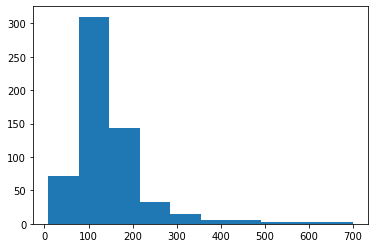

In [5222]:
plt.hist(train_data['LoanAmount'])

#### As you can see , LoanAmount has skewed distribution we will impute missing values with median.

In [5223]:
train_data['LoanAmount']=train_data['LoanAmount'].fillna(train_data['LoanAmount'].median())
test_data['LoanAmount']=test_data['LoanAmount'].fillna(train_data['LoanAmount'].median())

#### Distribution for Loan_Amount_Term

(array([  3.,   6.,   3.,  44.,   4.,   0.,  13., 512.,   0.,  15.]),
 array([ 12. ,  58.8, 105.6, 152.4, 199.2, 246. , 292.8, 339.6, 386.4,
        433.2, 480. ]),
 <a list of 10 Patch objects>)

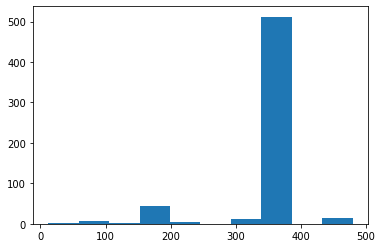

In [5224]:
plt.hist(train_data['Loan_Amount_Term'])

#### Impute missing values with median

In [5225]:
train_data['Loan_Amount_Term']=train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median())
test_data['Loan_Amount_Term']=test_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median())

#### Distribution for Credit_History

(array([ 89.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 475.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

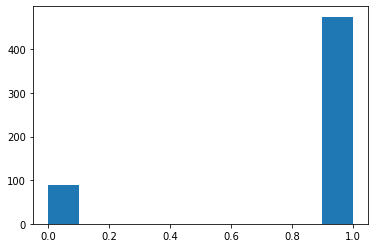

In [5226]:
plt.hist(train_data['Credit_History'])

#### Impute missing values with mode

In [5227]:
train_data['Credit_History']=train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0])
test_data['Credit_History']=test_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0])

#### Check if there are any null values left after imputation

In [5228]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [5229]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#### Let's encode categorical variables now

#### Gender and Married columns each has two categories lets map them with 0 and 1

In [5230]:
train_data['Gender']=train_data['Gender'].apply(lambda x : 0 if x=='Male' else 1)
test_data['Gender']=test_data['Gender'].apply(lambda x : 0 if x=='Male' else 1)

In [5231]:
train_data['Married']=train_data['Married'].apply(lambda x : 0 if x=='Yes' else 1)
test_data['Married']=test_data['Married'].apply(lambda x : 0 if x=='Yes' else 1)



#### Dependents column has some order , we will use ordinal encoding for this.

In [5232]:
ordinal_enc=OrdinalEncoder()

In [5233]:
train_data['Dependents']=ordinal_enc.fit_transform(train_data[['Dependents']])

In [5234]:
test_data['Dependents']=ordinal_enc.transform(test_data[['Dependents']])

In [5235]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,0,0,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,0,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,0,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,1,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Let's see value counts for Education

In [5236]:
train_data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

#### As Education and Self_Employed columns have only two categories , we will map them with 0 and 1

In [5237]:
train_data['Education']=train_data['Education'].apply(lambda x : 0 if x=='Not Graduate' else 1)
test_data['Education']=test_data['Education'].apply(lambda x : 0 if x=='Not Graduate' else 1)

In [5238]:
train_data['Self_Employed']=train_data['Self_Employed'].apply(lambda x : 0 if x=='No' else 1)
test_data['Self_Employed']=test_data['Self_Employed'].apply(lambda x : 0 if x=='No' else 1)

#### Print value counts for Property_Area

In [5239]:
train_data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

#### Let's map these three categories.

In [5240]:
train_data['Property_Area']=train_data['Property_Area'].apply(lambda x : 0 if x=='Rural' else 1 if x=='Semiurban' else 2)
test_data['Property_Area']=test_data['Property_Area'].apply(lambda x : 0 if x=='Rural' else 1 if x=='Semiurban' else 2)

#### Now let's label target column

In [5241]:
label_enc=LabelEncoder()

In [5242]:
train_data['Loan_Status']=label_enc.fit_transform(train_data['Loan_Status'])

In [5243]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0.0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,0,0,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,0,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,0,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,1,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [5244]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,0,0.0,1,0,5720,0,110.0,360.0,1.0,2
1,LP001022,0,0,1.0,1,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,0,0,2.0,1,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,0,0,2.0,1,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,0,1,0.0,0,0,3276,0,78.0,360.0,1.0,2


#### We don't need Loan_ID as it is unique for each applicant, so let's drop them from train and test data

In [5245]:
train_data.drop(['Loan_ID'],axis=1,inplace=True)
test_data.drop(['Loan_ID'],axis=1,inplace=True)

In [5246]:
target_labels=train_data['Loan_Status']
train_data.drop(['Loan_Status'],axis=1,inplace=True)

#### Let's make our first basic model using Logistic Regression

In [5247]:
logistic_reg=LogisticRegression()

In [5248]:
np.mean(cross_val_score(logistic_reg,train_data,target_labels,cv=5))

0.8046800634584876

In [5249]:
logistic_reg.fit(train_data,target_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [5250]:
def makeSubmission(estimator,test_data,filename,username):
    predictions=estimator.predict(test_data)
    predictions= list(map(lambda x: 'Y' if x==1 else 'N',predictions))
    Loan_ID=pd.read_csv('Dataset/test.csv')['Loan_ID']
    submissions=pd.DataFrame({'Loan_ID':Loan_ID,'Loan_Status':predictions})
    savedAs = 'submission'+'_'+filename+'_'+username
    submissions.to_csv(savedAs+'.csv',index=False)
    print("File saved as {}".format(savedAs))

In [5251]:
makeSubmission(logistic_reg,test_data,'logitsic_regression','nitika') #0.777

File saved as submission_logitsic_regression_nitika


#### Now let's try xgboost model

In [5252]:
import xgboost as xgb

In [5253]:
xgb_classifier=xgb.XGBClassifier()

In [5254]:
xgb_classifier.fit(train_data,target_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [5255]:
np.mean(cross_val_score(xgb_classifier,train_data,target_labels,cv=5))

0.7704918032786885

In [5256]:
makeSubmission(xgb_classifier,test_data,'Xgboost_','nitika') #0.777

File saved as submission_Xgboost__nitika


#### Feature Engineering

In [5257]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0.0,1,0,5849,0.0,128.0,360.0,1.0,2
1,0,0,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0
2,0,0,0.0,1,1,3000,0.0,66.0,360.0,1.0,2
3,0,0,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,0,1,0.0,1,0,6000,0.0,141.0,360.0,1.0,2


In [5258]:
def dependent_category(married,gender):
    if gender==0 and married==0:
        return 'wife'
    elif gender==1 and married==0:
        return 'husband'
    else:
        return 'other'

In [5259]:
dependent_cat=[]
for i in range(len(train_data)):
    category=dependent_category(train_data['Married'][i],train_data['Gender'][i])
    dependent_cat.append(category)

In [5260]:
train_data['Dependent_Category']=dependent_cat

In [5261]:
dependent_cat_test=[]
for i in range(len(test_data)):
    category=dependent_category(test_data['Married'][i],test_data['Gender'][i])
    dependent_cat_test.append(category)

In [5262]:
test_data['Dependent_Category']=dependent_cat_test

In [5263]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependent_Category
0,0,1,0.0,1,0,5849,0.0,128.0,360.0,1.0,2,other
1,0,0,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,wife
2,0,0,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,wife
3,0,0,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,wife
4,0,1,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,other


In [5264]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependent_Category
0,0,0,0.0,1,0,5720,0,110.0,360.0,1.0,2,wife
1,0,0,1.0,1,0,3076,1500,126.0,360.0,1.0,2,wife
2,0,0,2.0,1,0,5000,1800,208.0,360.0,1.0,2,wife
3,0,0,2.0,1,0,2340,2546,100.0,360.0,1.0,2,wife
4,0,1,0.0,0,0,3276,0,78.0,360.0,1.0,2,other


In [5265]:
train_data['Dependent_Category']=train_data['Dependent_Category'].apply(lambda x : 0 if x=='husband' else 1 if x=='wife' else 2)
test_data['Dependent_Category']=test_data['Dependent_Category'].apply(lambda x : 0 if x=='husband' else 1 if x=='wife' else 2)

In [5266]:
train_data['Loan_Percent']=(train_data['LoanAmount']/(train_data['ApplicantIncome']+train_data['CoapplicantIncome']))*100

In [5267]:
test_data['Loan_Percent']=(test_data['LoanAmount']/(test_data['ApplicantIncome']+test_data['CoapplicantIncome']))*100

In [5268]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependent_Category,Loan_Percent
0,0,1,0.0,1,0,5849,0.0,128.0,360.0,1.0,2,2,2.188408
1,0,0,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,1,2.101461
2,0,0,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,1,2.200000
3,0,0,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,2.428658
4,0,1,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,2,2.350000


In [5269]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependent_Category,Loan_Percent
0,0,1,0.0,1,0,5849,0.0,128.0,360.0,1.0,2,2,2.188408
1,0,0,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,1,2.101461
2,0,0,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,1,2.200000
3,0,0,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,2.428658
4,0,1,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,2,2.350000


In [5270]:
train_data.shape

(614, 13)

In [5271]:
xgb_classifier_1=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.10, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [5272]:
xgb_classifier_1.fit(train_data,target_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=0, silent=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=1)

In [5273]:
np.mean(cross_val_score(xgb_classifier_1,train_data,target_labels,cv=5))

0.8111845584346906

In [5274]:
makeSubmission(xgb_classifier_1,test_data,'Xgboost_f1','nitika') #0.777

File saved as submission_Xgboost_f1_nitika


#### Neural Network using tensorflow

In [5275]:
scaler=StandardScaler()
train_data=scaler.fit_transform(train_data)
test_data=scaler.transform(test_data)

In [5276]:
train_data.shape

(614, 13)

In [5277]:
import tensorflow as tf

In [5278]:
input_num_units=13
hidden_num_units=7
output_num_units=2

In [5279]:
x = tf.placeholder(tf.float32, [None, input_num_units])
print(x.shape)
y = tf.placeholder(tf.float32, [None, output_num_units])
print(y.shape)

(?, 13)
(?, 2)


In [5280]:
epochs=50
batch_size=35
learning_rate=0.016
seed=128

In [5281]:
rng = np.random.RandomState(seed)

In [5282]:
def dense_to_one_hot(labels_dense, num_classes=2):
    """Convert class labels from scalars to one-hot vectors"""
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

In [5283]:
def batch_creator(batch_size, dataset_length, dataset_name):
    """Create batch with random samples and return appropriate format"""
    batch_mask = rng.choice(dataset_length, batch_size)
    batch_x = eval(dataset_name + '_data')[[batch_mask]].reshape(-1,input_num_units)
    
    if dataset_name == 'train':
        batch_y = eval('target_labels').ix[batch_mask].values
        batch_y = dense_to_one_hot(batch_y)
        
    return batch_x, batch_y

In [5284]:
weights = {
    'hidden': tf.Variable(tf.random_normal([input_num_units, hidden_num_units], seed=seed)),
    'output': tf.Variable(tf.random_normal([hidden_num_units, output_num_units], seed=seed))
}

In [5285]:
biases = {
    'hidden': tf.Variable(tf.random_normal([hidden_num_units], seed=seed)),
    'output': tf.Variable(tf.random_normal([output_num_units], seed=seed))
}

In [5286]:
hidden_layer=tf.add(tf.matmul(x,weights['hidden']),biases['hidden'])
hidden_layer = tf.nn.relu(hidden_layer)

output_layer = tf.matmul(hidden_layer, weights['output']) + biases['output']

In [5287]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer,labels=y))

In [5288]:
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [5289]:
init=tf.initialize_all_variables()

In [5290]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        avg_cost=0
        total_batches=int(train_data.shape[0]/batch_size)
        for i in range(total_batches):
            batch_x,batch_y=batch_creator(batch_size,train_data.shape[0],'train')
            _,c=sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
            avg_cost+=c/total_batches
        #print("Epoch:", (epoch+1), "cost =", "{:.5f}".format(avg_cost))
        
    pred_temp = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(pred_temp, "float"))
    print("Validation Accuracy:", accuracy.eval({x: train_data.reshape(-1, input_num_units), y: dense_to_one_hot(target_labels)}))
    predict = tf.argmax(output_layer, 1)
    pred = predict.eval({x: test_data.reshape(-1, input_num_units)})

Validation Accuracy: 0.83224756


In [5291]:
predictions= list(map(lambda x: 'Y' if x==1 else 'N',pred))
Loan_ID=pd.read_csv('Dataset/test.csv')['Loan_ID']
submissions=pd.DataFrame({'Loan_ID':Loan_ID,'Loan_Status':predictions})
savedAs = 'submission'+'_'+'NN'+'_'
submissions.to_csv(savedAs+'.csv',index=False)
print("File saved as {}".format(savedAs))

File saved as submission_NN_


In [5292]:
data1=pd.read_csv('submission_NN_.csv')
data2=pd.read_csv('submission_Xgboost_f1_nitika.csv')

In [5293]:
data1['Loan_Status'].value_counts()

Y    297
N     70
Name: Loan_Status, dtype: int64

In [5294]:
data2['Loan_Status'].value_counts()

Y    292
N     75
Name: Loan_Status, dtype: int64